**This CNN was created predict whether or not an area of land contained a cemetery or not**

In [ ]:
#Mounting 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
cemetery_boxes_dir = "/content/drive/Shareddrives/UAVs n' stuff/Data Files"
cemetary_zipfiles = os.listdir(cemetery_boxes_dir)

zipfile_names = [cemetery_boxes_dir + x for x in cemetary_zipfiles]
zipfile_names

["/content/drive/Shareddrives/UAVs n' stuff/Data FilesUAV_lab.zip",
 "/content/drive/Shareddrives/UAVs n' stuff/Data FilesBoxes"]

In [ ]:
import zipfile
zipfile.ZipFile("/content/drive/Shareddrives/UAVs n' stuff/Data Files/UAV_lab.zip").extractall()


**Building a CNN**

In [ ]:
#Loading in the data for the CNN
train_dir = "/content/UAV_lab"
train_categories = set(os.listdir(train_dir))
test_dir = "/content/test"
test_categories = set(os.listdir(test_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))
print(sorted(test_categories))
print(len(test_categories))

Warning!:  {'.DS_Store'}
['.DS_Store', 'cemetery', 'not_cemetery']
3
['cemetery', 'not_cemetery']
2


In [ ]:

import tensorflow as tf

train_dir = "/content/UAV_lab"

from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 114 images belonging to 2 classes.


**Fitting the model**

In [ ]:
#fitting the model with specified layers and padding 
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_image_iterator,
    epochs=100,
    shuffle=True
)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 10.8277 - accuracy: 0.2719
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 119.7557 - accuracy: 0.7281
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 81.9128 - accuracy: 0.7281
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 43.7742 - accuracy: 0.7281
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 28.0384 - accuracy: 0.7281
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 10.4197 - accuracy: 0.7281
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 4.6683 - accuracy: 0.7281
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 1.3985 - accuracy: 0.7281
Epoch 9/100
1/1 [==============================] - 6s 6s/step - loss: 2.4408 - accuracy: 0.3246
Epoch 10/100
1/1 [==============================] - 6s 6s/step - loss: 1.5847 - accuracy: 0.2807
Epoch 11/100
1/1 [==============

**Visualize the accuracy of the model**

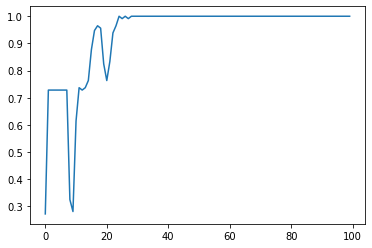

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(history.history['accuracy']))),
         history.history['accuracy'])
plt.show()

**Visualize the loss**

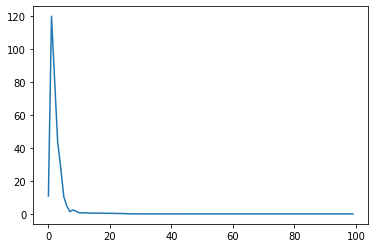

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.show()

**Evaluate the Model**

In [ ]:
import tensorflow as tf

test_dir = "/content/test"

test_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=test_dir,
    batch_size=128,
    shuffle=False,
    image_data_generator=None)

model.evaluate(test_image_iterator)

FileNotFoundError: ignored

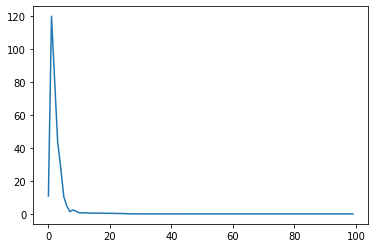

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.show()

**Calculating the F1**

In [ ]:
predictions = model.predict(test_image_iterator)

In [ ]:
actual_classes = test_image_iterator.classes

In [ ]:
import numpy as np

predicted_class = [np.argmax(p) for p in predictions]
predicted_class

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_classes, predicted_class, average='micro')

0.7058823529411765